In [1]:
import sys
utils_path = '/global/homes/f/fnafis/utils_nf/'
if utils_path not in sys.path:
    sys.path.append(utils_path)
import legend_utils_nf as lutils

In [4]:
legend_ana_dir = '/global/cfs/cdirs/legend/software/KrSTC/data/analysis/'
legend_data_dir = '/global/cfs/cdirs/legend/software/KrSTC/data/'



import os, h5py, json, copy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
#plt.style.use(legend_data_dir+'/clint.mpl')

from pygama.flow import DataGroup
from pygama.lgdo.lh5_store import load_nda, LH5Store
import pygama.math.histogram as pgh
from pygama.lgdo import ls, load_dfs
from pygama.dsp import build_dsp
from pygama.vis import WaveformBrowser

import pint
ureg = pint.UnitRegistry()

import pygama.lgdo.lh5_store as lh5
import pygama.math.histogram as pgh

dg = DataGroup(legend_data_dir+'krstc.json', load=True)





676    /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krs...
dtype: object


,energy,trapEmax,bl,bl_intercept,bl_slope,energy_cal
0,0,3600.690430,33709.402344,33709.187500,0.000450,-0.729366
1,0,2442.133301,34056.957031,34057.222656,-0.000495,-0.729366
2,0,2032.732422,33873.195312,33874.339844,-0.002370,-0.729366
3,0,74.190941,33698.773438,33698.609375,0.000383,-0.729366
4,0,261.919556,33699.113281,33698.855469,0.000594,-0.729366
...,...,...,...,...,...,...
122026,0,3598.955811,33805.601562,33805.835938,-0.000453,-0.729366
122027,0,702.451233,33781.984375,33780.902344,0.002265,-0.729366
122028,0,295.092010,33843.917969,33843.621094,0.000616,-0.729366
122029,0,352.864838,33787.992188,33788.355469,-0.000730,-0.729366


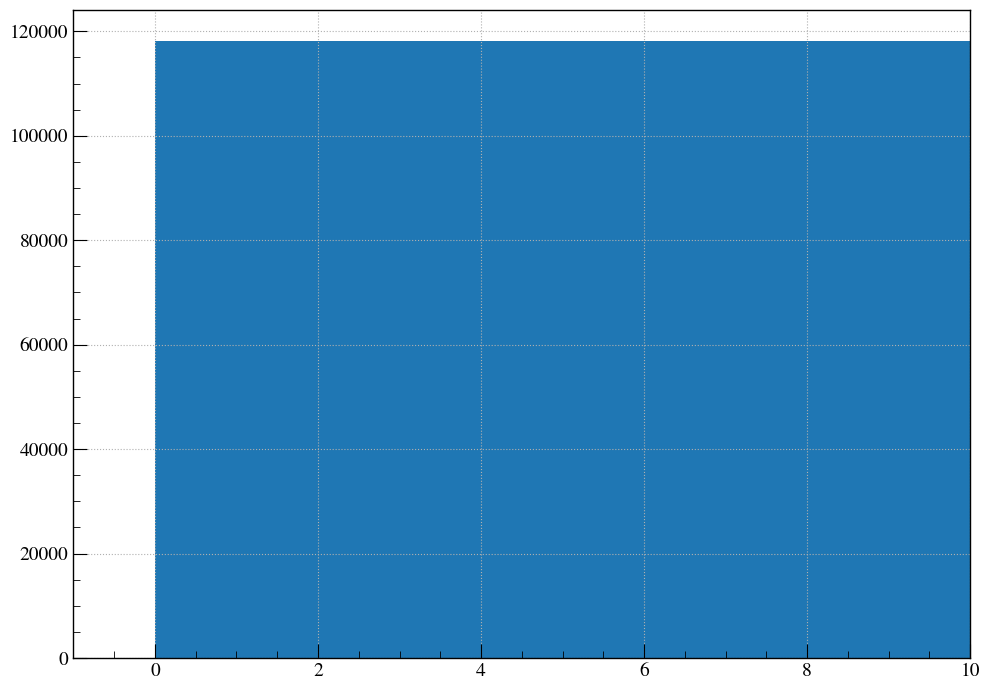

In [11]:
krtscDB = DataGroup('/global/cfs/cdirs/legend/software/KrSTC/data/krstc.json', load=True)
runDB = krtscDB.runDB
lh5_dir = krtscDB.lh5_dir
dsp_list = lh5_dir + krtscDB.fileDB['dsp_path'] + '/' + krtscDB.fileDB['dsp_file']

beginning_cycle = 2019

test_cycle = 2695 # this cycle has all negative energy events

# get dsp and hit files
hit_list = dsp_list[test_cycle-beginning_cycle:test_cycle-beginning_cycle+1]
print(hit_list)
e_lit = [238, 1460]
e_uncal = [5.515e5, 3.3745e6]
poly_coeffs = np.polyfit(e_uncal, e_lit, 1) 
poly_func = np.poly1d(poly_coeffs)

df_hit = lh5.load_dfs(hit_list, ['energy','trapEmax', 'bl', 'bl_intercept', 'bl_slope'] ,'ORSIS3302DecoderForEnergy/dsp')
df_hit['energy_cal'] = poly_func(df_hit['energy'])

plt.hist(df_hit['energy'], bins=1000)
plt.xlim(-1, 10)


df_hit



In [17]:
df_hit[df_hit.energy==0]['energy']

0         0
1         0
2         0
3         0
4         0
         ..
122026    0
122027    0
122028    0
122029    0
122030    0
Name: energy, Length: 118166, dtype: uint32

# checking wfs

Unit: ADC


,raw_file_index,raw_waveforms
0,1,"[34064, 34062, 34055, 34061, 34053, 34060, 340..."
1,4,"[33696, 33693, 33693, 33702, 33699, 33699, 336..."
2,122028,"[33845, 33845, 33842, 33846, 33845, 33839, 338..."


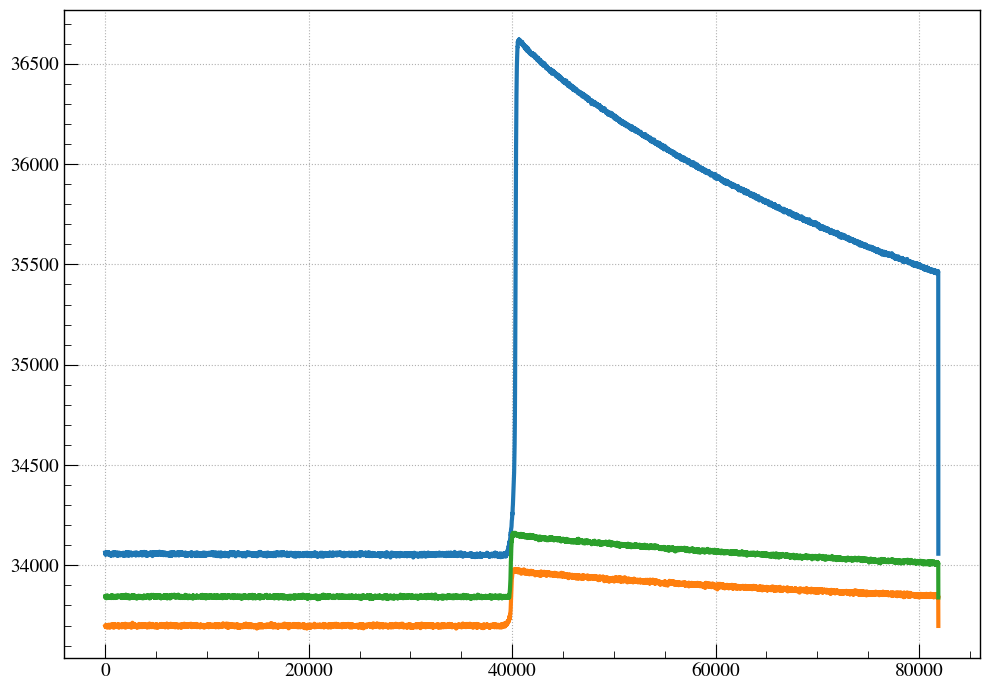

In [18]:
lutils.get_raw_wfs(hit_list.iloc[0].replace('dsp','raw'), indices=[1, 4, 122028], plot=True)

In [28]:
rf = hit_list.iloc[0].replace('dsp','raw')

f = h5py.File(rf, 'r')
print(list(f['ORSIS3302DecoderForEnergy/raw'].keys()))
print(f['ORSIS3302DecoderForEnergy/raw/timestamp'][0:10])

['card', 'channel', 'crate', 'energy', 'energy_first', 'packet_id', 'timestamp', 'waveform']
[ 7449292  7606424  7966827  8547866  8600192 10981234 12776215 15501556
 15713736 17232329]
